In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import scipy
from scipy import optimize
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [13]:
%%capture
data = pd.read_fwf("23-04-06-14-24.data",names=['null'])
data.shape

data[['number','time']] = data["null"].str.split(" ", 1, expand=True)
data = data.drop('null', axis=1)
data['number'] = data['number'].astype(float)
#df.query("`Courses Fee` >= 23000")
data
data = data.query('number < 40000 and number>4000')
xdata = data['number']

In [14]:
data['number']

15        7140.0
23        5120.0
24       10060.0
34        9640.0
36       17340.0
          ...   
63856    16480.0
63857    19740.0
63858     7060.0
63859     6020.0
63884     4480.0
Name: number, Length: 5804, dtype: float64

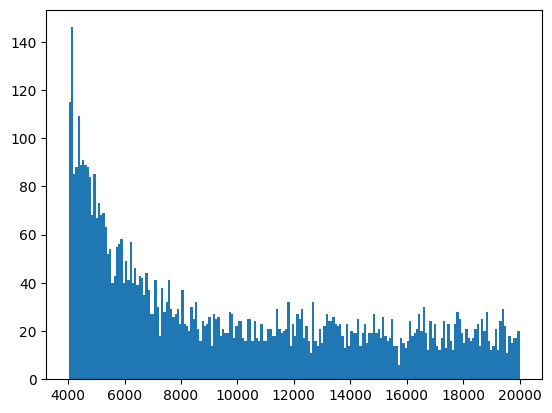

In [15]:
n, bins, patches = plt.hist(xdata,bins = 200)
plt.show()

In [16]:
avg_bin = []
for index in range(len(bins)-1):
    upper = bins[index+1]
    lower = bins[index]
    avg = (abs(upper+lower)/2)
    avg_bin.append(avg)

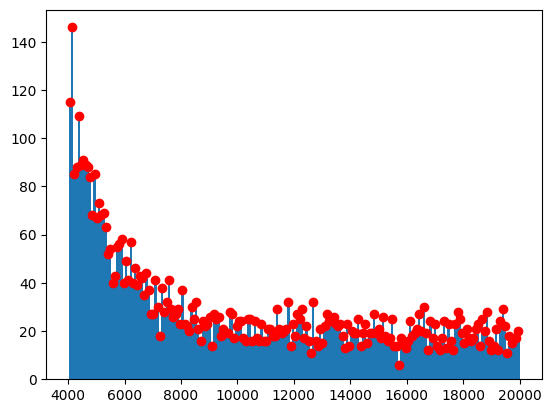

19960.05


In [17]:
#.plot(np.asarray(x, float), y)
plt.hist(np.asarray(data['number'], float),bins=200)
plt.scatter(avg_bin,n,color='r')
plt.show()
print(max(avg_bin))

avg = np.array(avg_bin)

In [18]:
def model_func(x, tau, off, amp):
    return off + amp * np.exp(-1.0 * x / tau)

In [19]:
p0 = [2000,40,50]
popt, pcov = optimize.curve_fit(model_func, avg_bin, n,p0)

print(popt)

tau = popt[0]
off = popt[1]
amp = popt[2]

[1530.10211597   19.35271189 1397.12197046]


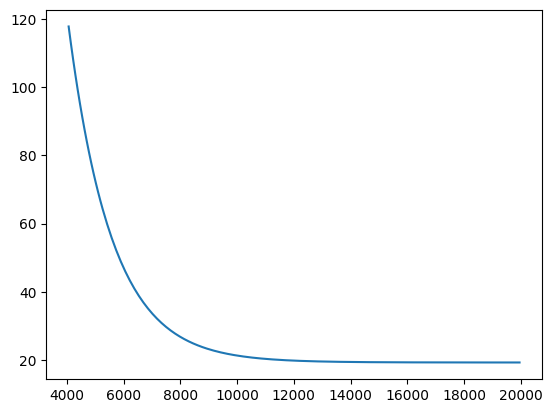

In [20]:
y_best_fit = np.apply_along_axis(model_func, 0, avg_bin, popt[0], popt[1], popt[2])

plt.plot(avg_bin, y_best_fit)
plt.show()

$f(y) = a + be^{-\frac{x}{\tau}}$

In [21]:
a = popt[0]
b = popt[1]
x_fitted = np.linspace(np.min(avg_bin), np.max(avg_bin), 200)
y_fitted = popt[2] * np.exp(-x_fitted/a) + b
print(b)

19.352711894621045


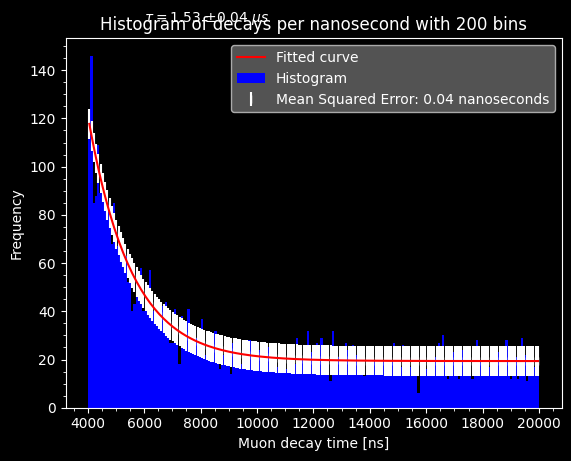

tau =  1530.102115969287


In [23]:
a = np.exp(p0[1])
b = p0[0]
x_fitted = np.linspace(np.min(avg_bin), np.max(avg_bin), 200)
y_guess = p0[2] * np.exp(-x_fitted/p0[0]) + p0[1]
mse = mean_squared_error(n,y_fitted)
text = '$\\tau = $' + str(round(tau*10**(-3),2)) + ' $\pm $' + str(round(mse*10**(-3),2)) + ' $\\mu s$'
mse = mean_squared_error(n,y_fitted)
mse_text = 'Mean Squared Error: ' + str(round(mse*10**(-3),2)) + ' nanoseconds'

with plt.style.context('dark_background'):
    plt.plot(x_fitted, y_fitted, 'r', label='Fitted curve')
    #plt.plot(x_fitted, y_guess, label='Fitted curve')
    plt.hist(np.asarray(data['number'], float),bins=200,label = 'Histogram',color='b')
    plt.text(6000,160,text)
    #plt.scatter(avg_bin,n,color='r',label = 'Value')
    plt.minorticks_on()
    plt.rcParams['axes.facecolor'] = 'dimgrey'
    plt.rcParams.update({'text.color': "white",
                         'axes.labelcolor': "black"})
    plt.errorbar(x_fitted,y_fitted,np.sqrt(mse),color='white',label= mse_text,fmt='|',zorder=1)
    plt.title('Histogram of decays per nanosecond with 200 bins')
    plt.ylabel('Frequency')
    plt.xlabel('Muon decay time [ns]')
    plt.legend()
    plt.show()
    print('tau = ', tau)

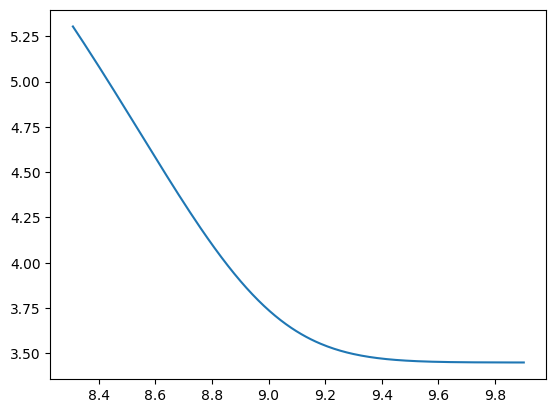

In [64]:
y_new = np.log(y_fitted)
x_new = np.log(x_fitted)


plt.plot(x_new,y_new)

In [65]:
popt

array([1455.63244973,   31.47370196, 2762.28213723])

In [66]:
tau = popt[0]
off = popt[1]
amp = popt[2]

ln_y = []
for i in range(len(y_fitted)):
    ln_y.append(np.log(y_fitted[i]))
    
ln_x = []
for i in range(len(x_fitted)):
    ln_x.append(np.log(x_fitted[i]))

$f(y) = o + ae^{-x/\tau}$

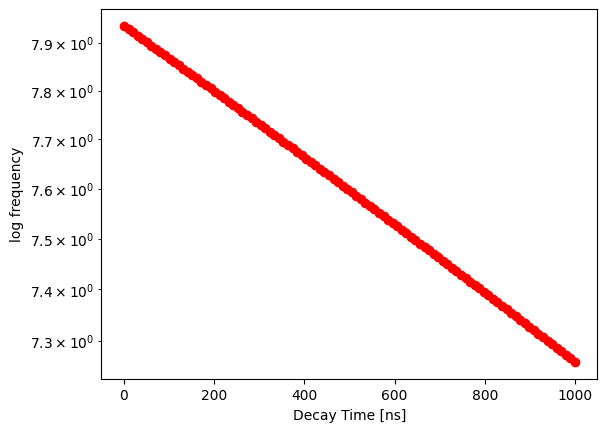

In [67]:
xline = np.linspace(0,1000,100)
yline = np.log(off + amp*np.exp(-xline/tau))


plt.scatter(xline,yline,color='r')
plt.xlabel('Decay Time [ns]')
plt.ylabel('log frequency')
plt.yscale('log')
plt.show()

In [68]:
"""
Measuring strength of weak force
"""

pi = np.pi
h_bar = 6.582*10**(-16)

c = 3*10**8
m = (1776.86*10**(6))/c**2
tau_s = tau*10**6

G_f = np.sqrt((192*pi**3*h_bar**7)/(tau_s*m**5*c**4))
G_f

3.001462136815754e-54

In [69]:
G_f_SI = G_f / 10**(-19)
G_f_SI

3.001462136815754e-35

In [70]:
G_f_real = 1.435*10**(-36)

print(G_f_real/G_f_SI)

0.04781003173081467


In [71]:
tau_real = 2.19698 * 10**3
print(tau/tau_real)

0.6625606285598473


In [72]:
lamda = 1/(tau*10**(-3))

In [73]:
lamda

0.6869866085928088

In [74]:
tau

1455.6324497334133

In [75]:
xdata

9         11800.0
19        14920.0
26         7660.0
35        18480.0
37         4040.0
           ...   
100534     7580.0
100550    10080.0
100567     9300.0
100582    18560.0
100589    11720.0
Name: number, Length: 9474, dtype: float64

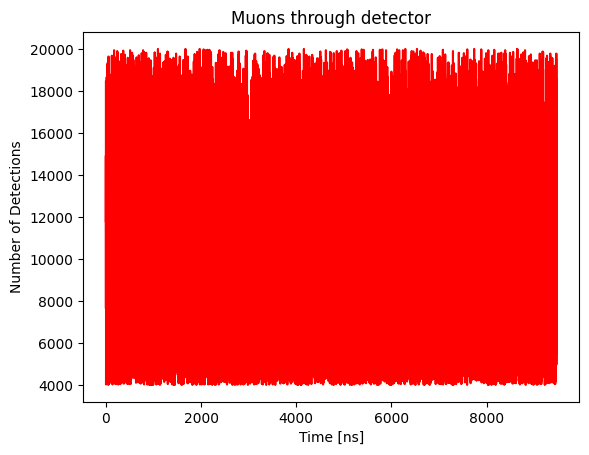

In [90]:
lin = []
for i in range(len(xdata)):
    lin.append(i)
    i=i+1
    
plt.plot(lin,xdata,color='r')
plt.title('Muons through detector')
plt.ylabel('Number of Detections')
plt.xlabel('Time [ns]')
plt.show()